In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet
from keras.datasets import mnist
from common.functions import softmax

Using TensorFlow backend.


In [2]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 1次元へ整形
x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)

# 正規化
x_train, x_test = x_train.astype(np.float32) / 255.0, x_test.astype(np.float32) / 255.0

In [3]:
x_base = x_train[0].copy()
x_base

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

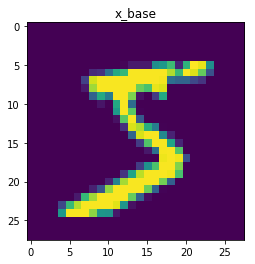

In [4]:
plt.imshow(x_base.reshape(28,28))
plt.title("x_base")
plt.show()

In [5]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# パラメータのロード
network.load_params("params_nn.pkl")
print("loaded Network Parameters!")

loaded Network Parameters!


In [6]:
pred = network.predict(x_base)
pred

array([-0.85297713, -3.66424245, -0.18508496,  9.85418412, -8.86099437,
       13.11292996, -6.54674727, -0.99105145, -2.4386287 ,  0.65709932])

In [7]:
pred_label = np.argmax(pred)
pred_label

5

In [8]:
pred_score = max(softmax(pred))
pred_score

0.9629792385831452

In [9]:
x = x_base.copy().reshape(1, 784)
grads = network.gradient(x, np.array([5]))
grads

{'W1': array([[ 0.,  0., -0., ...,  0.,  0., -0.],
        [ 0.,  0., -0., ...,  0.,  0., -0.],
        [ 0.,  0., -0., ...,  0.,  0., -0.],
        ...,
        [ 0.,  0., -0., ...,  0.,  0., -0.],
        [ 0.,  0., -0., ...,  0.,  0., -0.],
        [ 0.,  0., -0., ...,  0.,  0., -0.]]),
 'b1': array([ 0.59501187,  0.        , -0.08626725,  0.        ,  1.61602834,
        -0.2287034 ,  0.28330339,  0.2175782 , -0.14538351,  0.        ,
         0.        , -0.38700391, -0.17614508,  0.93815647, -0.32504232,
         0.        ,  0.11624453, -0.1421366 ,  0.        ,  0.09995574,
        -0.16060556, -0.23132116,  0.        ,  0.35436002, -0.52916375,
         0.        ,  0.23841823, -0.37942013,  0.        ,  0.        ,
         0.41232297, -0.90519429, -0.04907277,  0.        ,  0.        ,
        -0.29596362,  0.42391619,  0.        ,  0.19562347, -0.01368109,
         0.02194432,  1.15586554,  0.        ,  0.05876006, -0.38063817,
        -0.53019185,  0.45476403,  0.        ,

In [10]:
np.set_printoptions(threshold=np.inf)
print(grads['W1'])

[[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.0000

In [11]:
print(grads['W1'].shape)

(784, 50)


In [12]:
grads_w1_sum = np.sum(grads['W1'], axis=0)
grads_w1_sum

array([ 64.22628159,   0.        ,  -9.31178871,   0.        ,
       174.43600149, -24.68651402,  30.58010165,  23.48564742,
       -15.69286712,   0.        ,   0.        , -41.77365768,
       -19.01330706, 101.26571447, -35.0854505 ,   0.        ,
        12.54757106, -15.34239226,   0.        ,  10.78934067,
       -17.3359537 , -24.96907819,   0.        ,  38.25003749,
       -57.11855877,   0.        ,  25.73514422, -40.95505528,
         0.        ,   0.        ,  44.50662734, -97.70773783,
        -5.29697269,   0.        ,   0.        , -31.94666196,
        45.75801312,   0.        ,  21.11582766,  -1.47675298,
         2.36869565, 124.76548778,   0.        ,   6.34263027,
       -41.08653255, -57.22953309,  49.08776448,   0.        ,
         1.94712718, -52.60380931])

In [13]:
false_list = [[], [], [], [], [], [], [], [], [], []]
false_list

[[], [], [], [], [], [], [], [], [], []]

In [14]:
true_list = [[], [], [], [], [], [], [], [], [], []]
true_list

[[], [], [], [], [], [], [], [], [], []]

In [15]:
for i, t in enumerate(x_test):
    pre_l = np.argmax(network.predict(t))
    true_l = t_test[i]
    if pre_l == true_l:
        true_list[true_l].append(i)
    else:
        false_list[true_l].append(i)

In [16]:
len(true_list[5])

842

In [17]:
len(false_list[5])

50

In [18]:
def num_grads(nums, label):
    grads = []
    
    for x in nums:
        li = np.zeros(784)
        g = network.gradient(x.reshape(1, 784), np.array([label]))
        li += np.sum(g['W1'], axis=1)
        grads.append(li)
        
    grads = np.array(grads)
        
    return grads
    

In [19]:
def check_miss(advs, label):
    fig = plt.figure(figsize=(15, 15))
    
    miss = 0
    
    for i, x in enumerate(advs):
        ax = fig.add_subplot(5, 5, i+1)
        ax.imshow(x.reshape(28,28), 'gray')
        pre = network.predict(x)
        pre_label = np.argmax(pre)
        pre_score = max(softmax(pre))
        ax.set_title(f"{pre_label} : {pre_score}")
        
        if not pre_label == label:
            miss += 1

    plt.show()
    
    return miss/len(advs)

In [20]:
true_x_list = []
for i in range(10):
    true_nums = true_list[i][:10]
    true_x_list.append(np.array(list(map(lambda x: x_test[x], true_nums))))
    
true_x_list = np.array(true_x_list)
true_x_list

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [27]:
def generate_advs(num_list):
    adv_list = []
    for i in range(10):
        print(i)

        x_batch = num_list[i]

        print("x_batch start")
        print(check_miss(x_batch, i))
        print("x_batch_end")
#         print(x_batch[0])

        x_grads = num_grads(x_batch, i)

        p = np.sign(x_grads)*0.01

        print("p_start")
        print(check_miss(p, i))
#         print(p[0])
        print("p_end")

        advs = x_batch + p

        print(check_miss(advs, i))

    #     print(advs[0])

        print("#############################")
        
        adv_list.append(advs)
        
    
    adv_list = np.array(adv_list)
    return adv_list

0
x_batch start


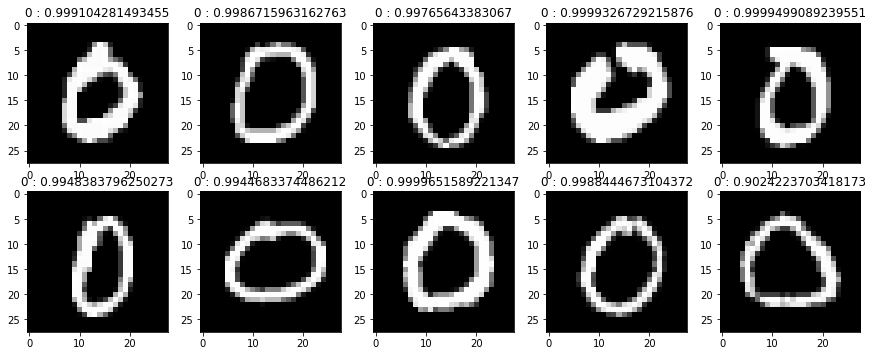

0.0
x_batch_end
p_start


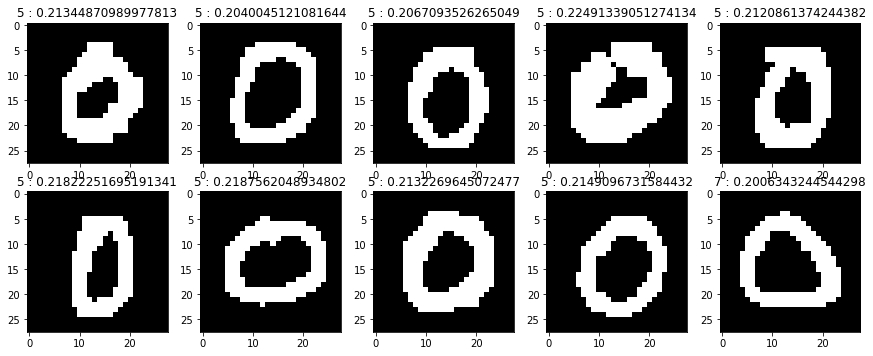

1.0
p_end


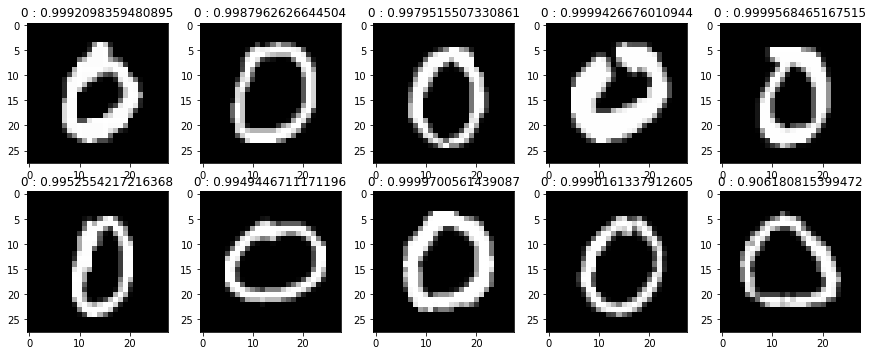

0.0
#############################
1
x_batch start


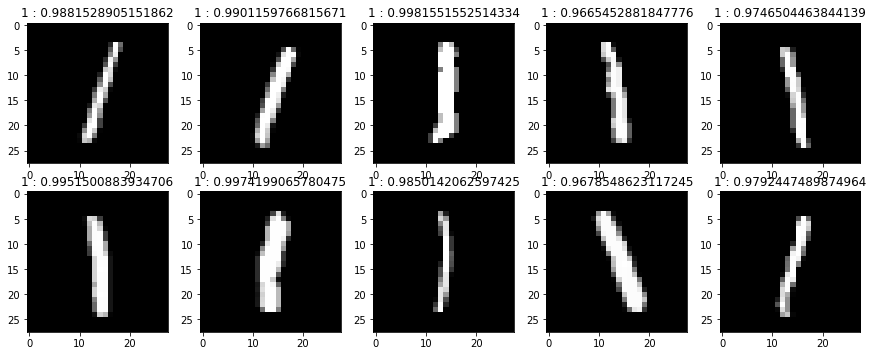

0.0
x_batch_end
p_start


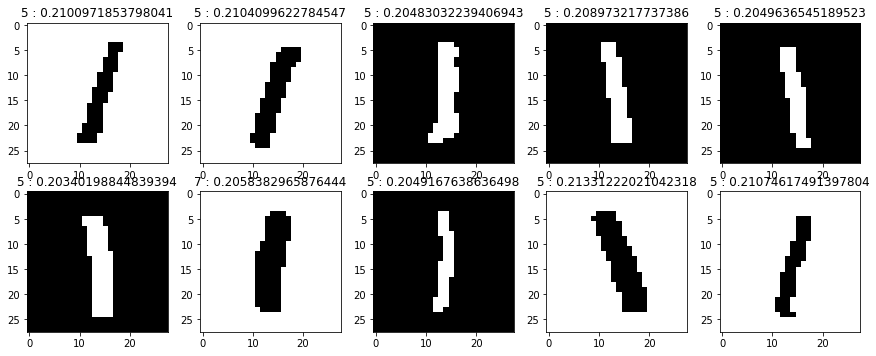

1.0
p_end


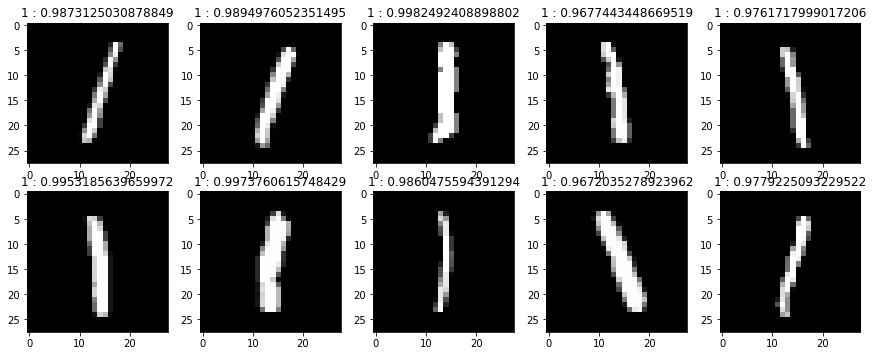

0.0
#############################
2
x_batch start


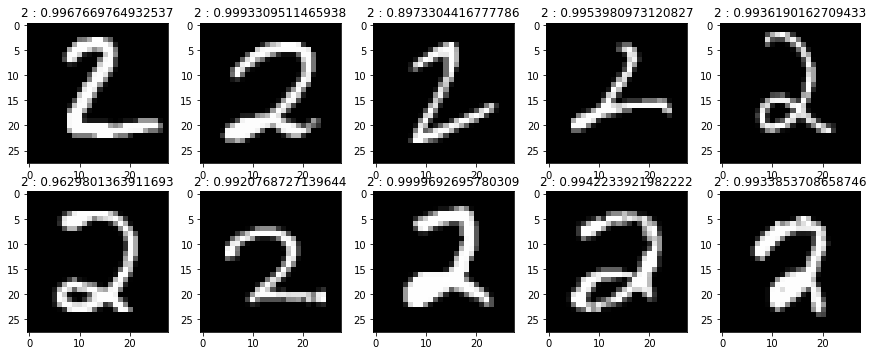

0.0
x_batch_end
p_start


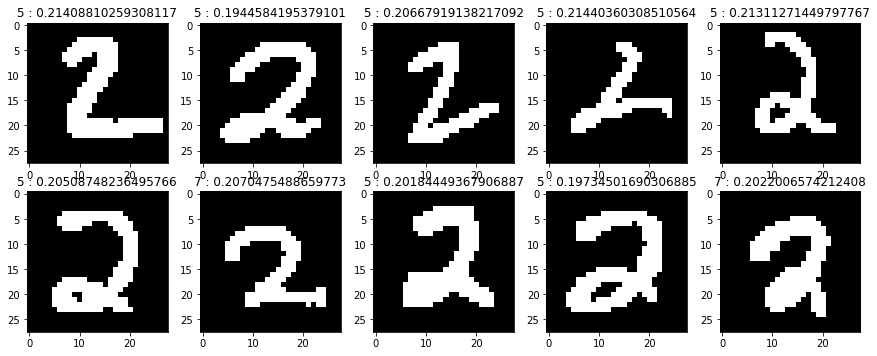

1.0
p_end


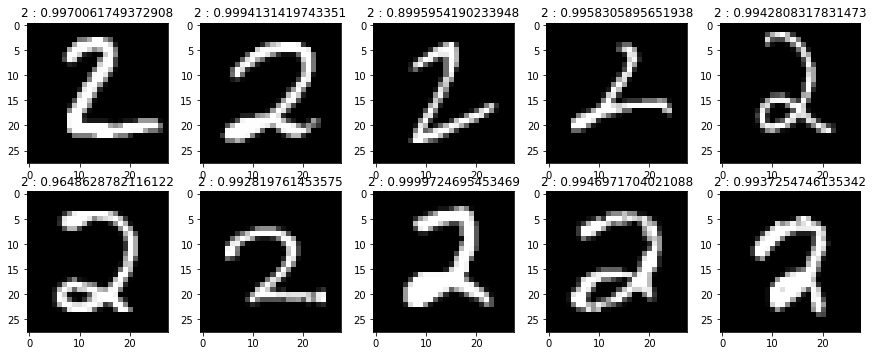

0.0
#############################
3
x_batch start


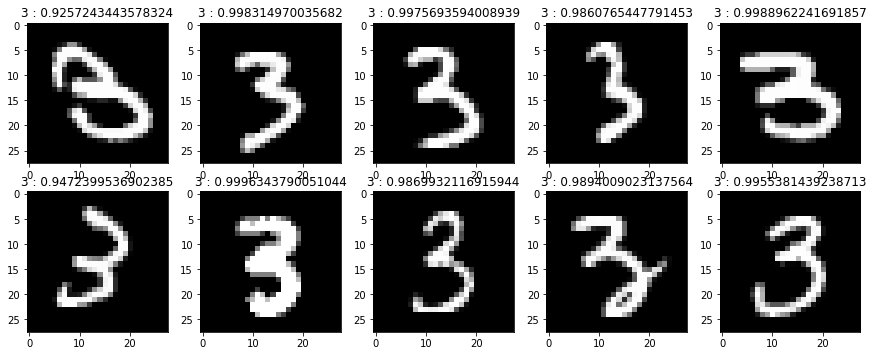

0.0
x_batch_end
p_start


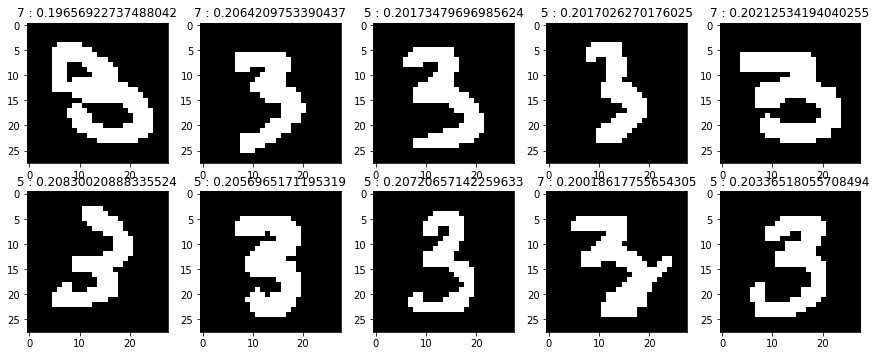

1.0
p_end


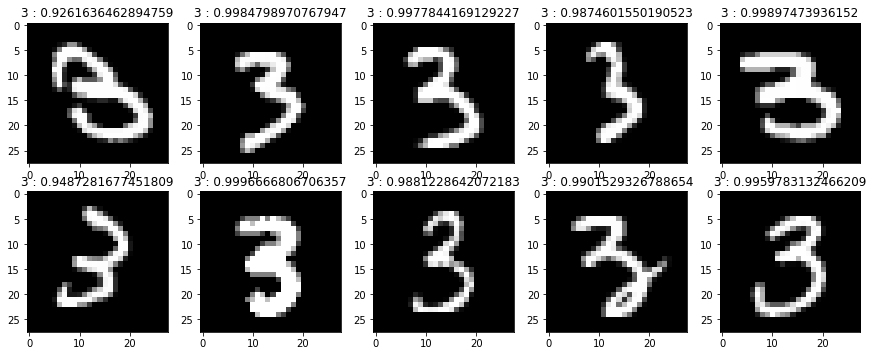

0.0
#############################
4
x_batch start


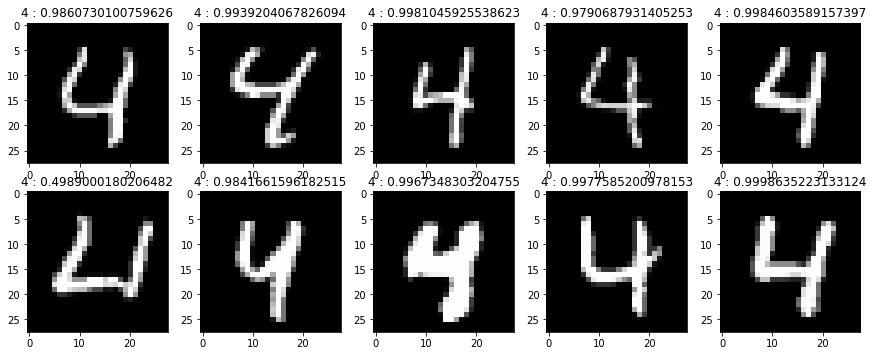

0.0
x_batch_end
p_start


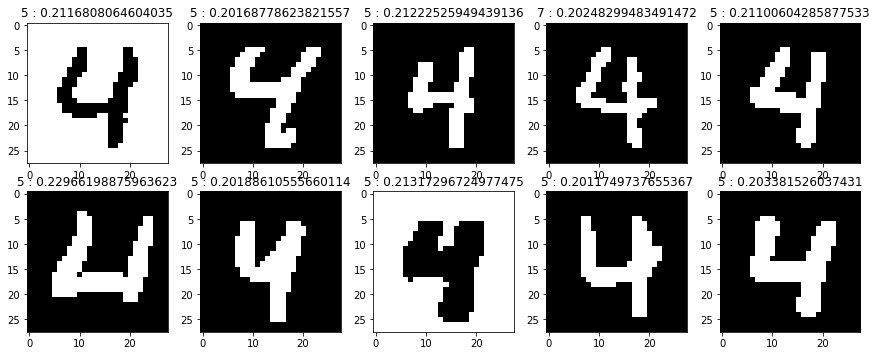

1.0
p_end


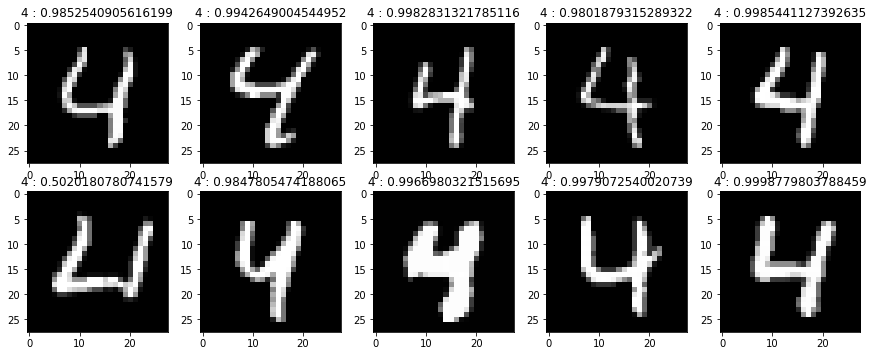

0.0
#############################
5
x_batch start


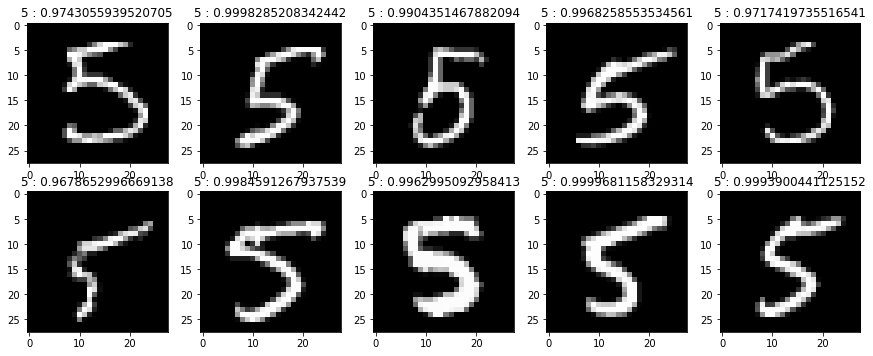

0.0
x_batch_end
p_start


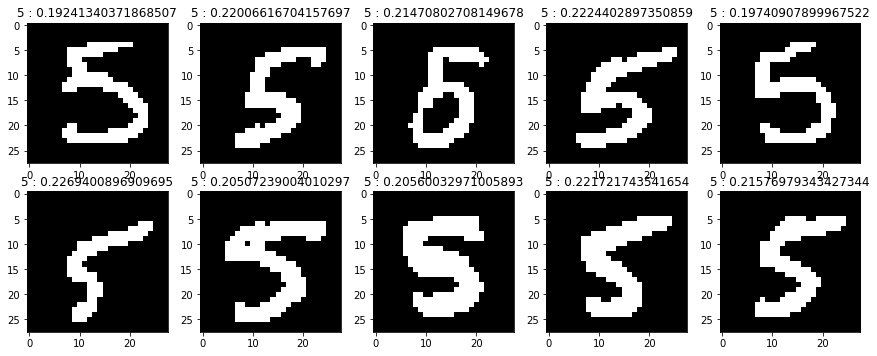

0.0
p_end


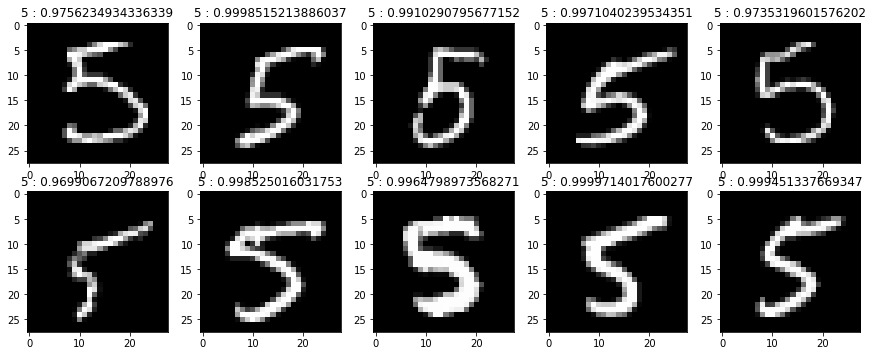

0.0
#############################
6
x_batch start


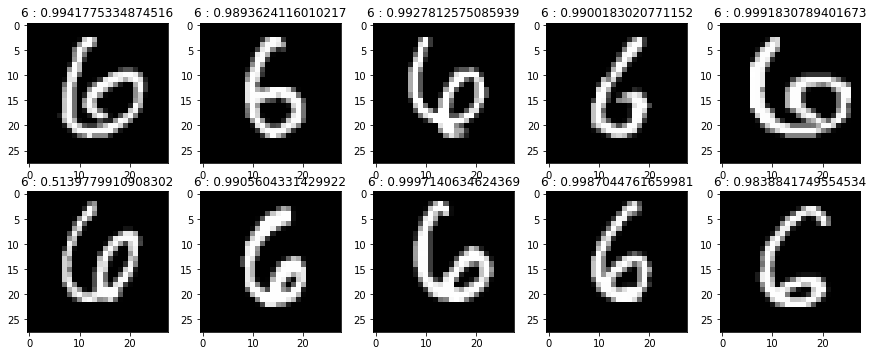

0.0
x_batch_end
p_start


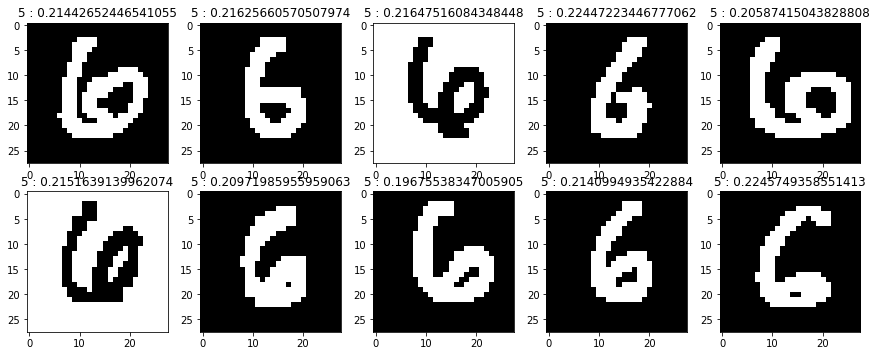

1.0
p_end


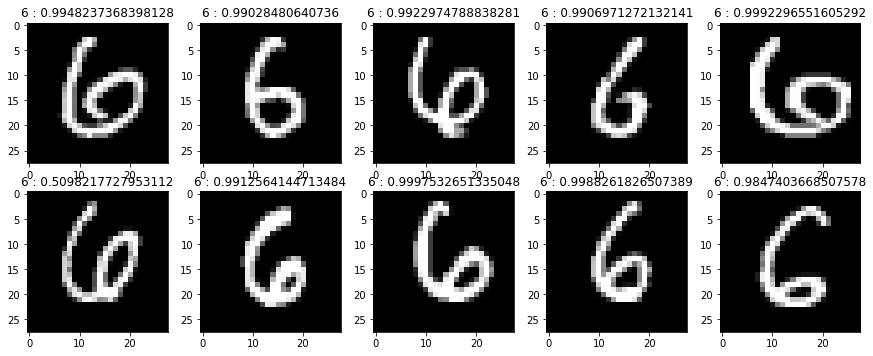

0.0
#############################
7
x_batch start


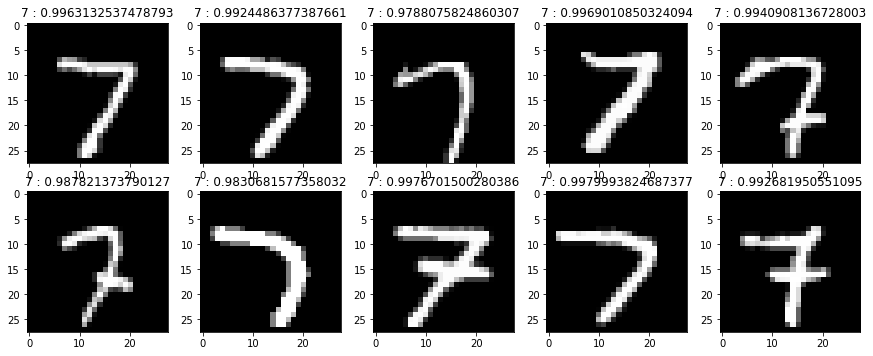

0.0
x_batch_end
p_start


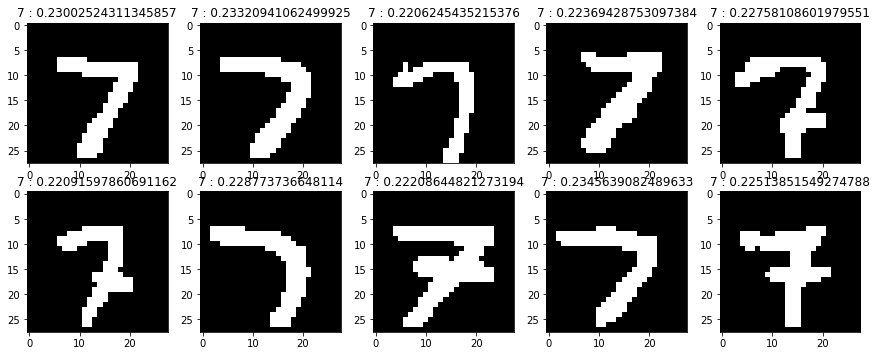

0.0
p_end


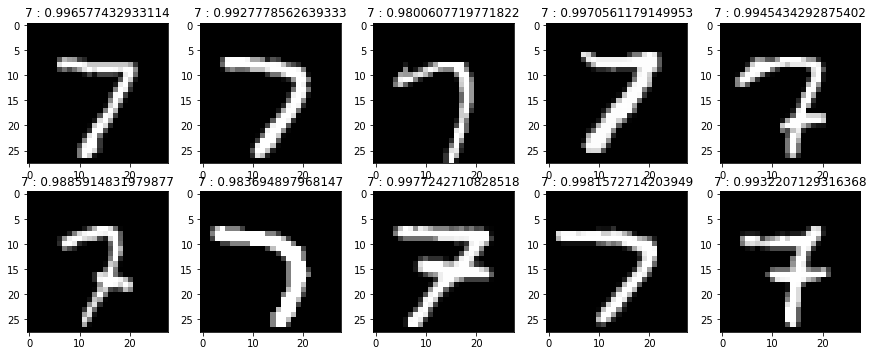

0.0
#############################
8
x_batch start


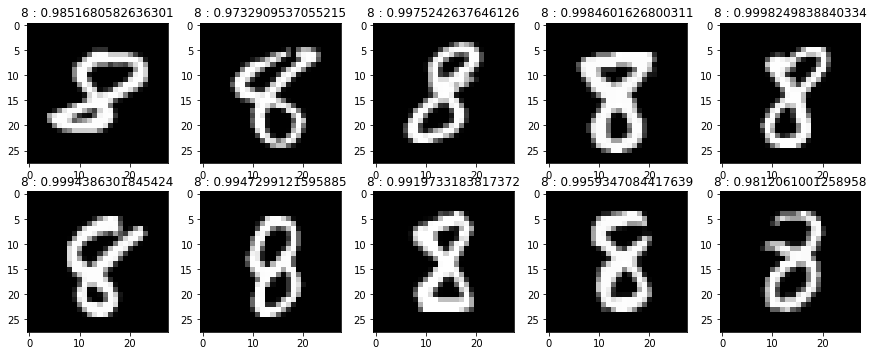

0.0
x_batch_end
p_start


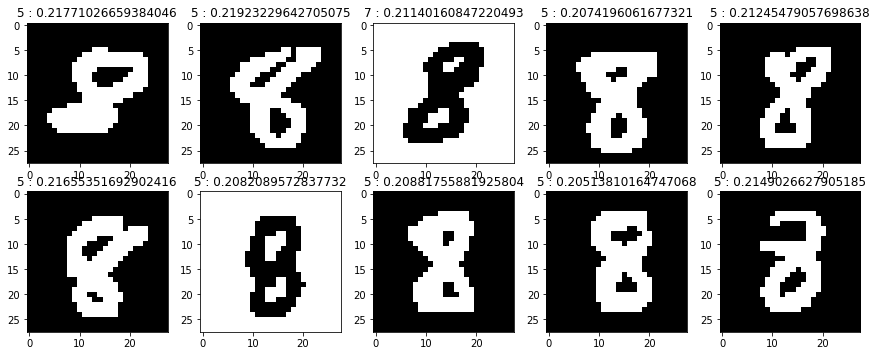

1.0
p_end


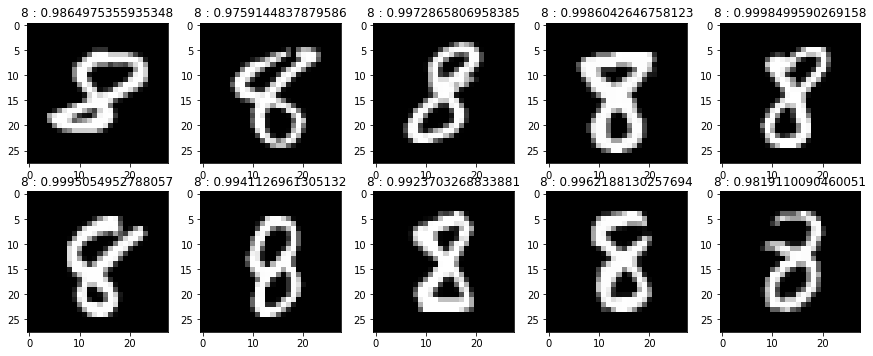

0.0
#############################
9
x_batch start


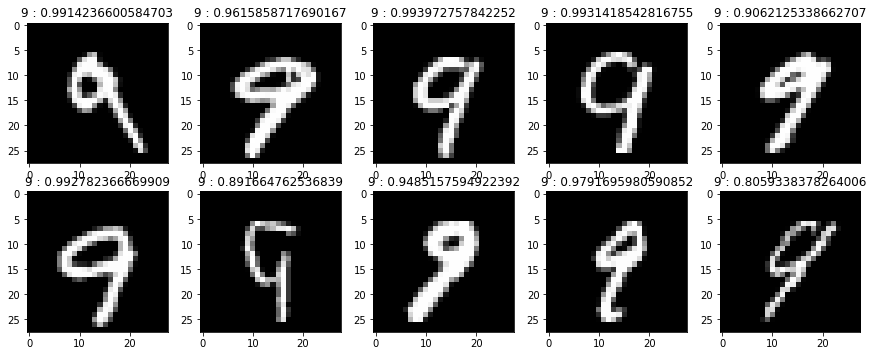

0.0
x_batch_end
p_start


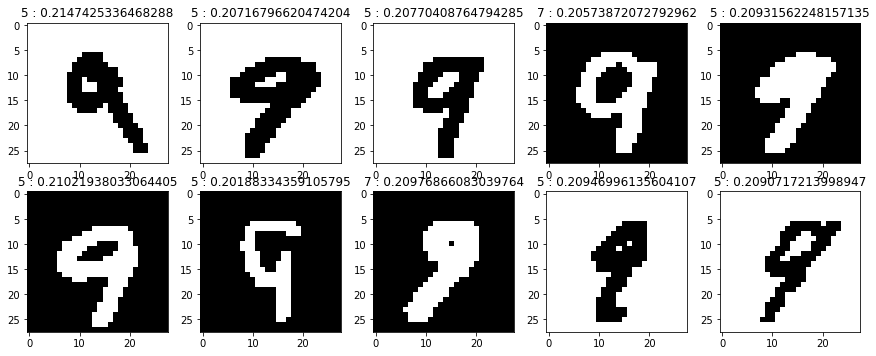

1.0
p_end


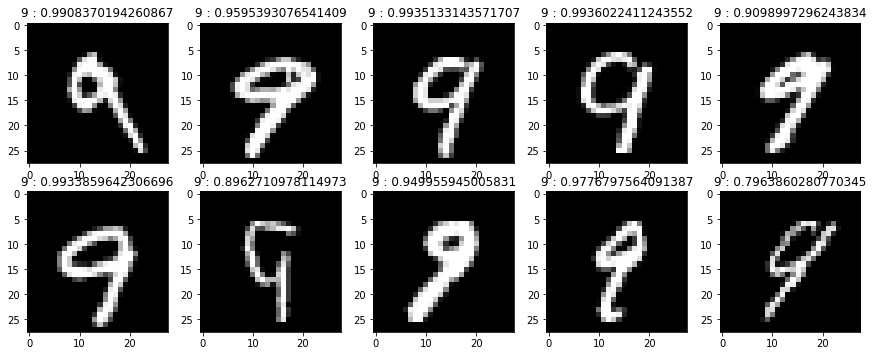

0.0
#############################


In [28]:
ad = generate_advs(true_x_list)

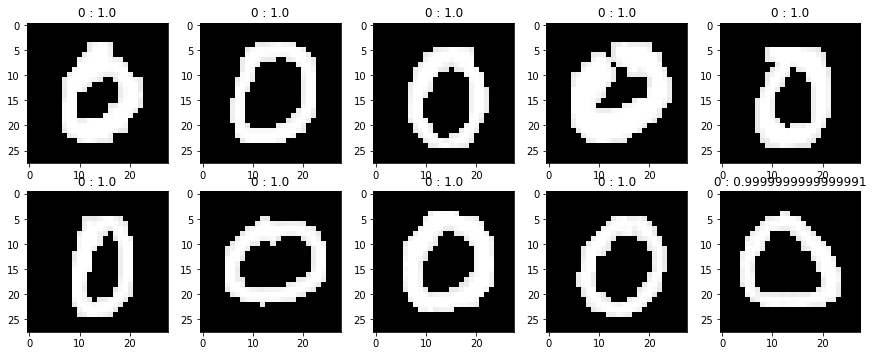

0.0


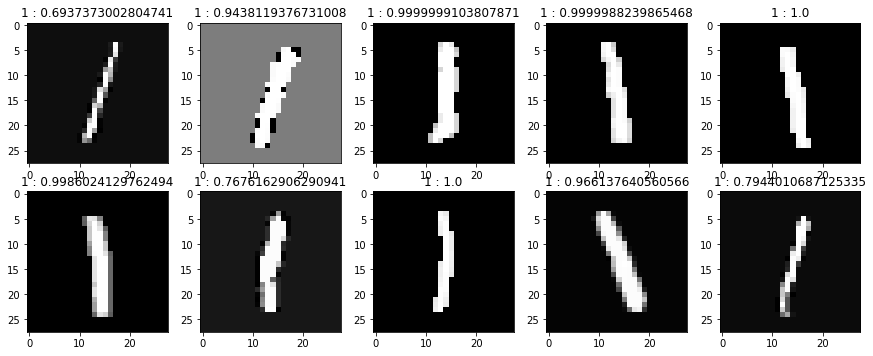

0.0


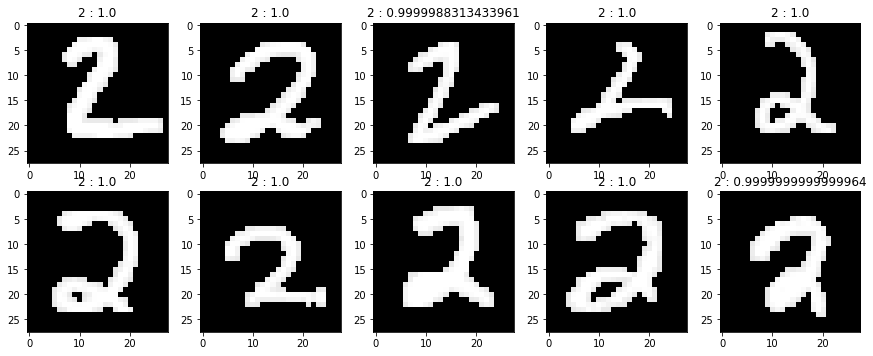

0.0


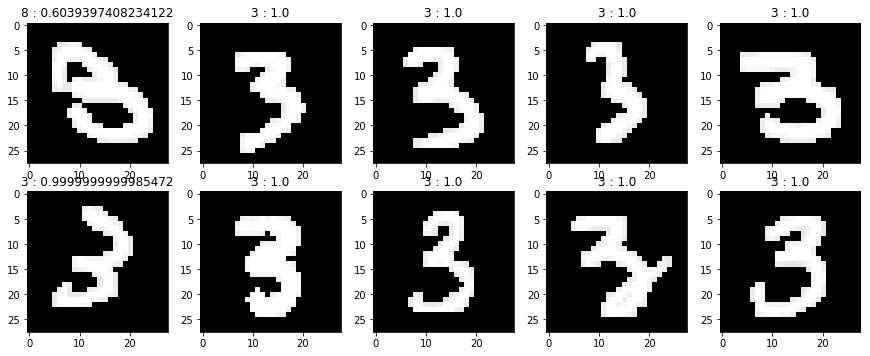

0.1


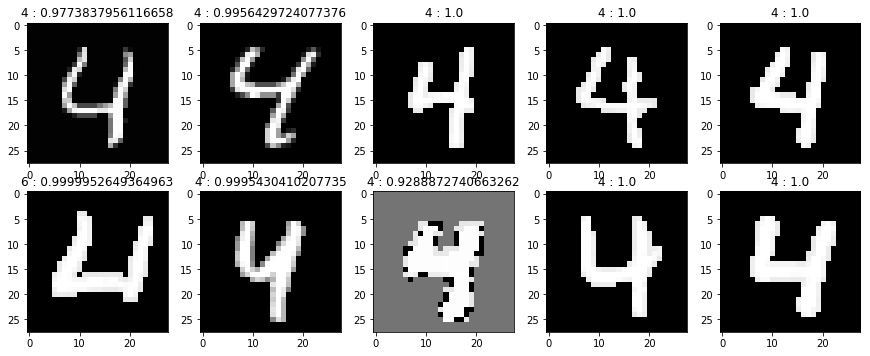

0.1


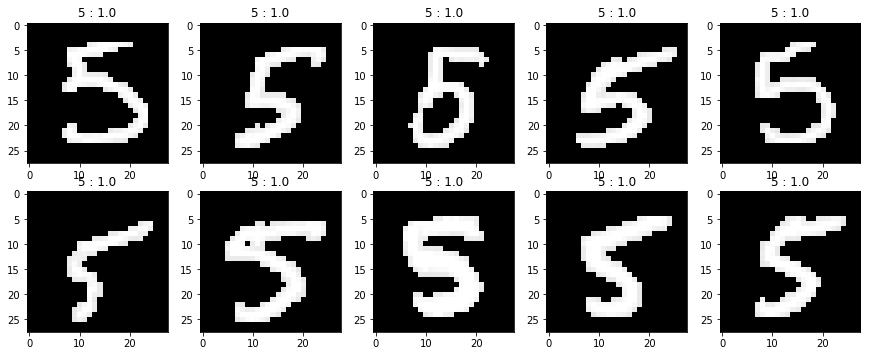

0.0


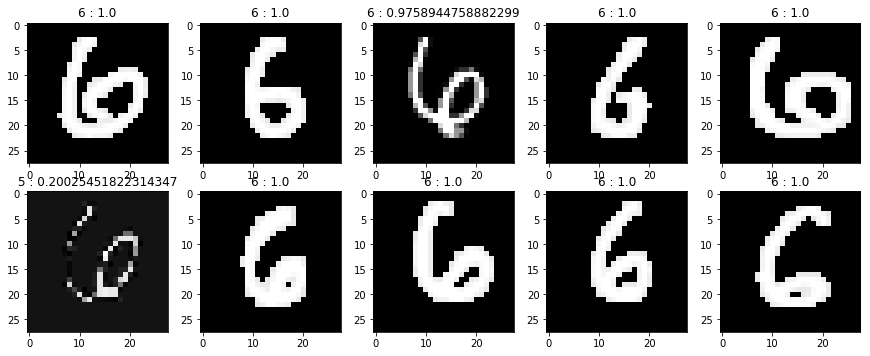

0.1


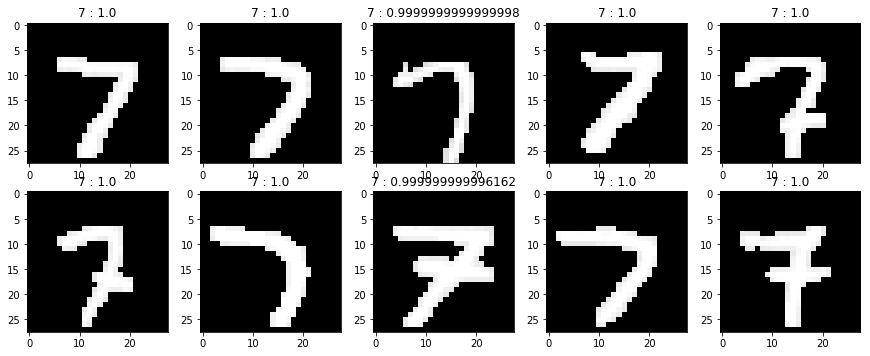

0.0


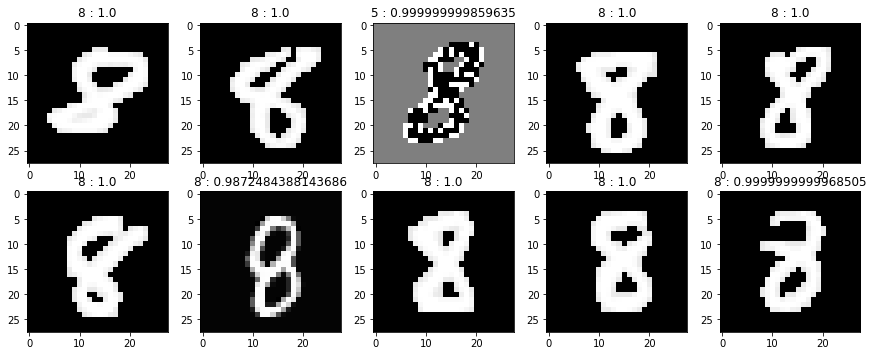

0.1


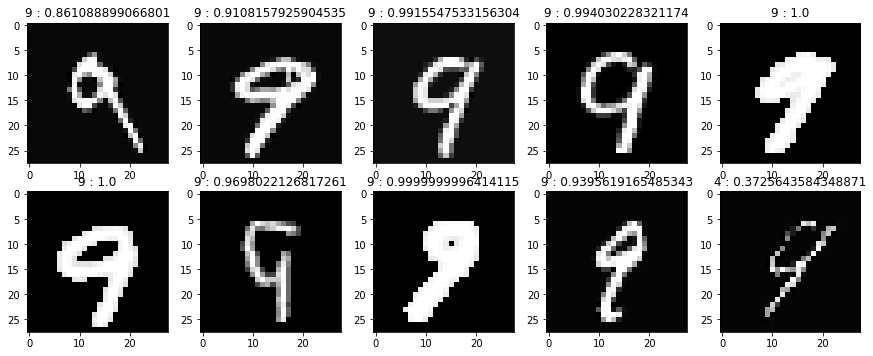

0.1


In [25]:
new_x = true_x_list
for i in range(100):
    new_x = generate_advs(new_x)
    
for i in range(10):
    print(check_miss(new_x[i], i))